# Podsumowanie mini projektu 

### Najważniejsze pomysły
- Podział na zbiór treningowy i testowy
- Adam vs SGD jako optymalizator
- ReLU/LeakyRelU na wyjściu (nigdy nie chcemy przewidywać ujemnej liczby wypożyczeń)
- Model z kilkoma warstwami, długie trenowanie
- Skalowanie wejść/wyjść - uwaga obliczamy skalowanie (np. min/max czy mean/std na zbiorze treningowym i **te same** wartości stosujemy na zbiorze testowym 

In [1]:
import torch, torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import numpy as np
import pandas as pd
import torch.utils.data as data
import seaborn as sns
import matplotlib.pyplot as plt

## Skalowanie wyjść wewnątrz sieci - batch norm
Na przykładzie z mini projektu

In [4]:
train_data = pd.read_csv("../Lab2/data.csv",index_col=0)

In [5]:
train = train_data.drop(columns=["casual","registered","cnt","dteday","season","yr","mnth"])
train_dataset = data.TensorDataset(torch.from_numpy(train.values).float(),torch.from_numpy(train_data.values[:,-1].astype(float)).float())

In [6]:
data_loader  = data.DataLoader(train_dataset, batch_size=256, shuffle=True)

In [7]:
class MyNet(nn.Module):
    def __init__(self): 
        super(MyNet, self).__init__()
        self.lin1 =nn.Linear(9, 48)  # 28 x 28 = 784
        self.act1 =nn.ReLU()
        self.lin2 =nn.Linear(48, 24)
        self.act2 =nn.ReLU()
        self.lin3 =nn.Linear(24, 1)
        
             
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        x = self.lin3(x)
        return x

In [8]:
class MyNetBN(nn.Module):
    def __init__(self): 
        super(MyNetBN, self).__init__()
        self.lin1 =nn.Linear(9, 48)  # 28 x 28 = 784
        self.bn1 = nn.BatchNorm1d(48)
        self.act1 =nn.ReLU()
        self.lin2 =nn.Linear(48, 24)
        self.bn2 = nn.BatchNorm1d(24)
        self.act2 =nn.ReLU()
        self.lin3 =nn.Linear(24, 1)
        
             
    def forward(self, x):
        x = self.lin1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.lin3(x)
        return x

In [9]:
model = MyNet()
print(model)

MyNet(
  (lin1): Linear(in_features=9, out_features=48, bias=True)
  (act1): ReLU()
  (lin2): Linear(in_features=48, out_features=24, bias=True)
  (act2): ReLU()
  (lin3): Linear(in_features=24, out_features=1, bias=True)
)


In [10]:
model_bn = MyNetBN()
print(model_bn)

MyNetBN(
  (lin1): Linear(in_features=9, out_features=48, bias=True)
  (bn1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (lin2): Linear(in_features=48, out_features=24, bias=True)
  (bn2): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (lin3): Linear(in_features=24, out_features=1, bias=True)
)


In [11]:
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.0001, momentum=0.5)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.0001, momentum=0.5)

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


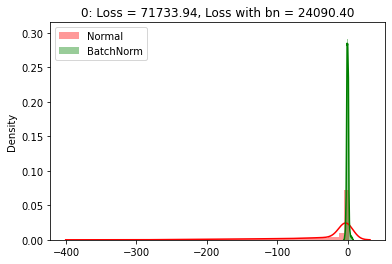

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


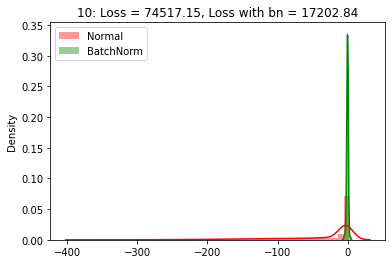

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


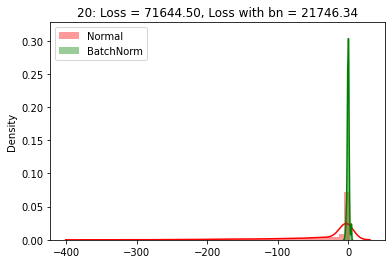

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


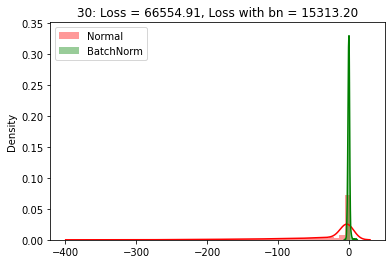

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


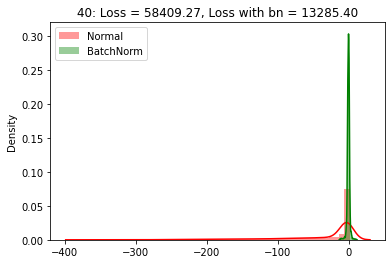

----------------------


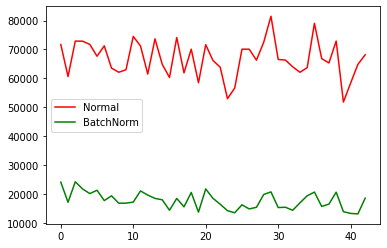

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


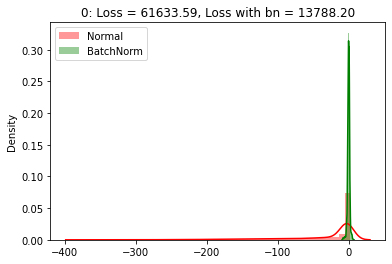

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


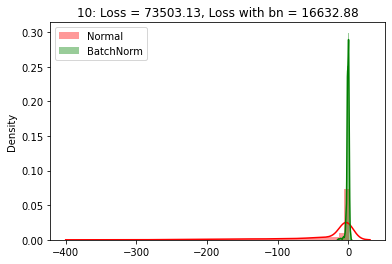

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


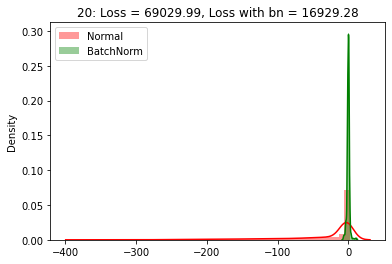

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


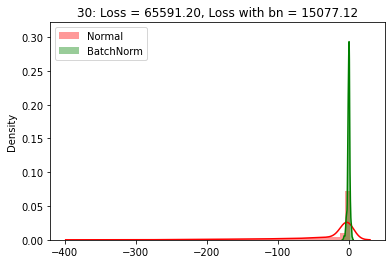

c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\robak\desktop\ssne\lab4\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


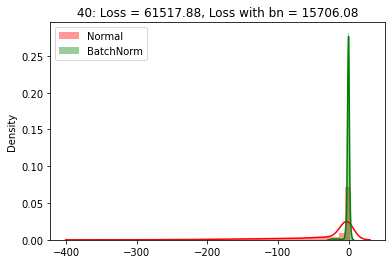

----------------------


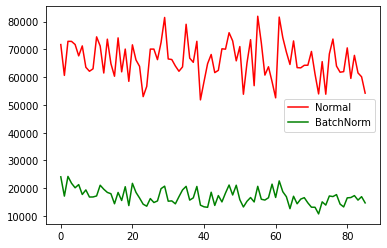

In [13]:
loss_arr = []
loss_bn_arr = []

max_epochs = 2

for epoch in range(max_epochs):
    for i, batch in enumerate(data_loader, 0):

        inputs, labels = batch

        # training steps for normal model
        opt.zero_grad()
        outputs = model(inputs).squeeze()
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # training steps for bn model
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs).squeeze()
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
        if i % 10 == 0:
        
            inputs = inputs.view(inputs.size(0), -1)
            
            model.eval()
            model_bn.eval()
            
            a = model.lin1(inputs)
            a = a.detach().numpy().ravel()
            sns.distplot(a, kde=True, color='r', label='Normal') 
            
            b = model_bn.lin1(inputs)
            b = model_bn.bn1(b)
            b = b.detach().numpy().ravel()
            
            sns.distplot(b, kde=True, color='g', label='BatchNorm') 
            plt.title('%d: Loss = %0.2f, Loss with bn = %0.2f' % (i, loss.item(), loss_bn.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            
            model.train()
            model_bn.train()
        
        
    print('----------------------')

    plt.plot(loss_arr, 'r', label='Normal')
    plt.plot(loss_bn_arr, 'g', label='BatchNorm')
    plt.legend()
    plt.show()

## Przeuczanie sieci

In [16]:
mnist_data = torchvision.datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)
mnist_train = mnist_data[:20]
mnist_val   = mnist_data[20:1000] 

In [17]:
device = torch.device("cuda") 
device

device(type='cuda')

In [18]:
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [19]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 800)
        self.act_1 =  nn.Tanh()
        self.layer2 = nn.Linear(800, 800)
        self.act_2 = nn.Tanh()
        self.layer3 = nn.Linear(800, 10)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.act_1(self.layer1(flattened))
        activation2 = self.act_2(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

In [20]:
def train(model, train, valid, batch_size=10, num_epochs=1, learn_rate=0.001, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(train,
                                               batch_size=batch_size,
                                               shuffle=True) # shuffle after every epoch
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate,momentum=0.9, weight_decay=weight_decay)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
#     n = 0 # the number of iterations
    idx = 0
    for n in range(num_epochs):
        for imgs, labels in iter(train_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            model.train() 
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         

            # save the current training information
            if idx % 10 == 9:
                iters.append(idx)
                losses.append(float(loss)/batch_size)        # compute *average* loss
                train_acc.append(get_accuracy(model, train)) # compute training accuracy 
                val_acc.append(get_accuracy(model, valid))   # compute validation accuracy
            idx+=1
        if n%100==0:
            print(f"Epoch {n}")

            
    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()


    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


train_acc_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100)
val_acc_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1000)

def get_accuracy(model, data):
    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


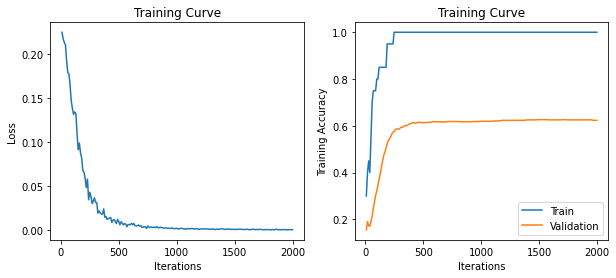

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6234693877551021


In [21]:
model = MNISTClassifier().to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

## Dropout
Maskowanie losowych neuronów w sieci

In [22]:
class MNISTClassifier_Dropout(nn.Module):
    def __init__(self):
        super(MNISTClassifier_Dropout, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 800)
        self.d1 = nn.Dropout(0.6)
        self.act_1 =  nn.Tanh()
        self.layer2 = nn.Linear(800, 800)
        self.d2 = nn.Dropout(0.6)
        self.act_2 = nn.Tanh()
        self.layer3 = nn.Linear(800, 10)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.act_1(self.layer1(flattened))
        x = self.d1(activation1)
        activation2 = self.act_2(self.layer2(x))
        x = self.d2(activation2)
        output = self.layer3(x)
        return output

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


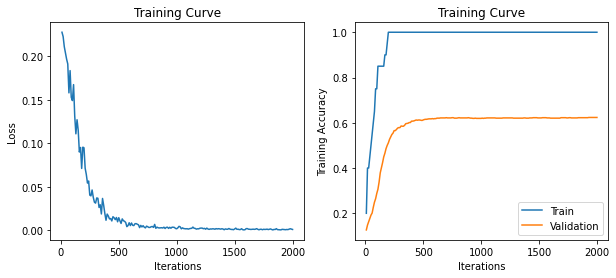

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6234693877551021


In [23]:
model = MNISTClassifier_Dropout().to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

## Weight decay
Regularyzacja zmian wag

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


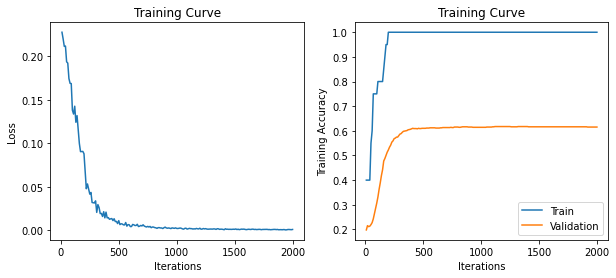

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6153061224489796


In [24]:
model = MNISTClassifier().to(device)
train(model, mnist_train, mnist_val, num_epochs=1000, weight_decay=0.001)

## Zadanie - własna regularyzacja

In [25]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 800)
        self.act_1 =  nn.Tanh()
        self.layer2 = nn.Linear(800, 800)
        self.act_2 = nn.Tanh()
        self.layer3 = nn.Linear(800, 10)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.act_1(self.layer1(flattened))
        activation2 = self.act_2(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

In [34]:
model = MNISTClassifier().to(device)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=10, shuffle=True) # shuffle after every epoch
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


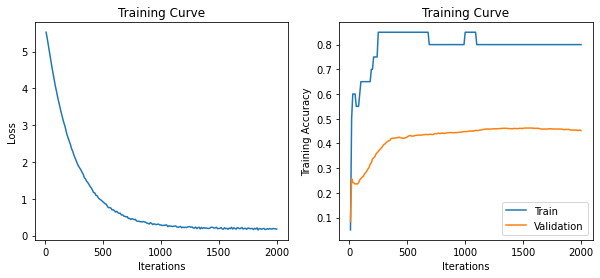

Final Training Accuracy: 0.8
Final Validation Accuracy: 0.4520408163265306


In [35]:
iters, losses, train_acc, val_acc = [], [], [], []

idx = 0
for n in range(1000):
    for imgs, labels in iter(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        model.train() 
        out = model(imgs)

        regularization = 0.1 * sum(p.pow(2).sum() for p in model.parameters())

        loss = criterion(out, labels) + regularization # compute the total loss as a sum of loss + regularization
        loss.backward()               
        optimizer.step()              
        optimizer.zero_grad()         

        if idx % 10 == 9:
            iters.append(idx)
            losses.append(float(loss)/10)        # compute *average* loss
            train_acc.append(get_accuracy(model, mnist_train)) # compute training accuracy 
            val_acc.append(get_accuracy(model, mnist_val))   # compute validation accuracy
        idx+=1
    if n%100==0:
        print(f"Epoch {n}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()


print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

# Wielkość sieci a jej jakość

In [36]:
class MNISTClassifier_parametrized(nn.Module):
    def __init__(self,size_1,size_2):
        super(MNISTClassifier_parametrized, self).__init__()
        self.layer1 = nn.Linear(28 * 28, size_1)
        self.act_1 =  nn.Tanh()
        self.layer2 = nn.Linear(size_1, size_2)
        self.act_2 = nn.Tanh()
        self.layer3 = nn.Linear(size_2, 10)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.act_1(self.layer1(flattened))
        activation2 = self.act_2(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


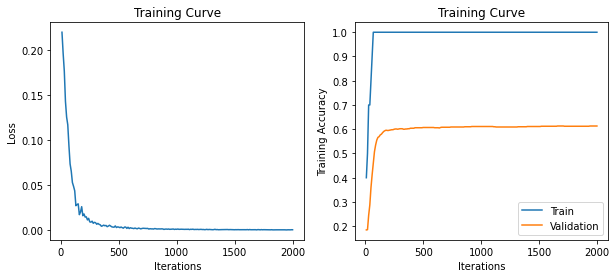

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.613265306122449


In [37]:
model = MNISTClassifier_parametrized(5000,3000).to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


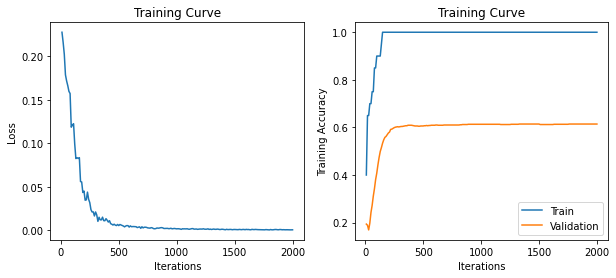

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6142857142857143


In [38]:
model = MNISTClassifier_parametrized(2000,1000).to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


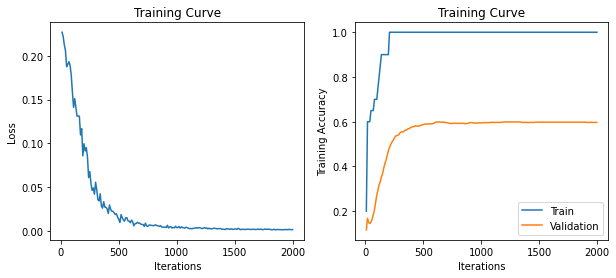

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.5969387755102041


In [39]:
model = MNISTClassifier_parametrized(1000,100).to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


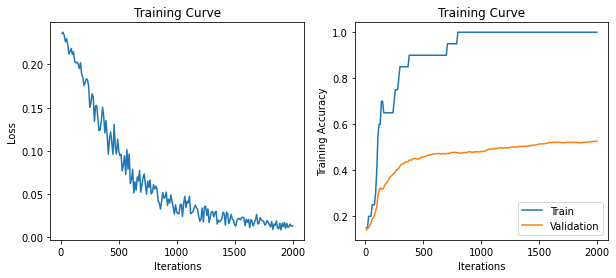

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.5255102040816326


In [40]:
model = MNISTClassifier_parametrized(20,10).to(device)
train(model, mnist_train, mnist_val, num_epochs=1000)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
Epoch 1000
Epoch 1100
Epoch 1200
Epoch 1300
Epoch 1400
Epoch 1500
Epoch 1600
Epoch 1700
Epoch 1800
Epoch 1900
Epoch 2000
Epoch 2100
Epoch 2200
Epoch 2300
Epoch 2400
Epoch 2500
Epoch 2600
Epoch 2700
Epoch 2800
Epoch 2900
Epoch 3000
Epoch 3100
Epoch 3200
Epoch 3300
Epoch 3400
Epoch 3500
Epoch 3600
Epoch 3700
Epoch 3800
Epoch 3900
Epoch 4000
Epoch 4100
Epoch 4200
Epoch 4300
Epoch 4400
Epoch 4500
Epoch 4600
Epoch 4700
Epoch 4800
Epoch 4900


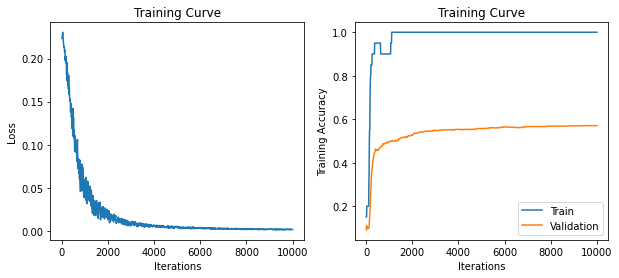

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.5704081632653061


In [41]:
model = MNISTClassifier_parametrized(20,10).to(device)
train(model, mnist_train, mnist_val, num_epochs=5000)

# Przeszukiwanie hiperparametrów
Uwaga, wykonanie poniższych komórek może zająć sporo czasu

In [ ]:
def fast_accuracy(model, data):
    with torch.no_grad():
        correct = 0
        total = 0
        model.eval()
        imgs, labels = data
        output = model(imgs.to(device))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred).to(device)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train_search(model, train, valid, batch_size=10, num_epochs=1, learn_rate=0.001, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(train,
                                               batch_size=batch_size,
                                               shuffle=True) # shuffle after every epoch
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate,momentum=0.9, weight_decay=weight_decay)

    iters, losses, train_acc, val_acc = [], [], [], []

    idx = 0
    for n in range(num_epochs):
        for imgs, labels in iter(train_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            model.train()
            out = model(imgs)            
            loss = criterion(out, labels) 
            loss.backward()               
            optimizer.step()              
            optimizer.zero_grad()         

    return(fast_accuracy(model, valid))

In [ ]:
mnist_val_preprocessed = torch.cat([batch[0] for batch in mnist_val]), torch.tensor([batch[1] for batch in mnist_val])
mnist_data = torchvision.datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)
mnist_train = mnist_data[:20]
mnist_val   = mnist_data[20:10000] 

In [ ]:
first_layer = [20000, 10000, 5000, 2000, 1000, 500, 100, 50, 10]
second_layer = [20000, 10000, 5000, 2000, 1000, 500, 100, 50, 10]
results = pd.DataFrame()
for i in range(len(first_layer)):
    for j in range(len(second_layer)):
        model = MNISTClassifier_parametrized(first_layer[i],second_layer[j]).to(device)
        val_acc = train_search(model, mnist_train, mnist_val_preprocessed, num_epochs=1000)
        print(first_layer[i],second_layer[j],val_acc)
        results = results.append({"first": first_layer[i], "second": second_layer[j],"acc":val_acc},ignore_index=True)

In [42]:
#results.to_csv("params_search.csv",index=False)
results = pd.read_csv("params_search.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'params_search.csv'

NameError: name 'results' is not defined

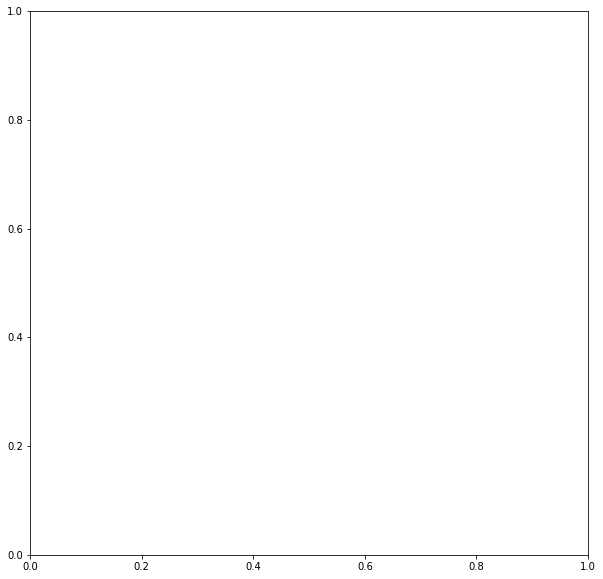

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(results["first"], results["second"], c=np.exp(results.acc*100), cmap="YlGn", s=1000)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("First layer")
plt.ylabel("Second layer")
for idx, row in results.iterrows():
    ax.annotate(str(row.acc)[:5], (row["first"]*0.82, row["second"]))
plt.show()

In [44]:
class MNISTClassifier_parametrized_3(nn.Module):
    def __init__(self,size_1,size_2, size_3):
        super(MNISTClassifier_parametrized_3, self).__init__()
        self.layer1 = nn.Linear(28 * 28, size_1)
        self.act_1 =  nn.Tanh()
        self.layer2 = nn.Linear(size_1, size_2)
        self.act_2 = nn.Tanh()
        self.layer3 = nn.Linear(size_2, size_3)
        self.act_3 = nn.Tanh()
        self.layer4 = nn.Linear(size_3, 10)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.act_1(self.layer1(flattened))
        activation2 = self.act_2(self.layer2(activation1))
        activation3 = self.act_3(self.layer3(activation2))
        output = self.layer4(activation3)
        return output

## Sieć o większej liczbie warstw wymaga dłuższego treningu

Epoch 0


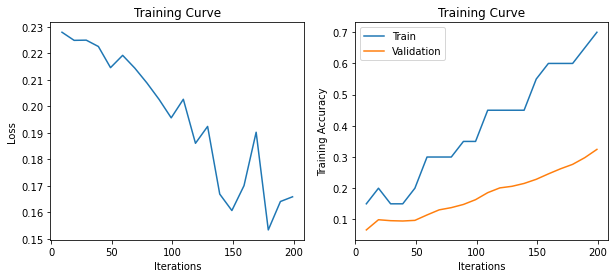

Final Training Accuracy: 0.7
Final Validation Accuracy: 0.32448979591836735


In [45]:
model = MNISTClassifier_parametrized_3(1000,500,100).to(device)
train(model, mnist_train, mnist_val, num_epochs=100)

Epoch 0


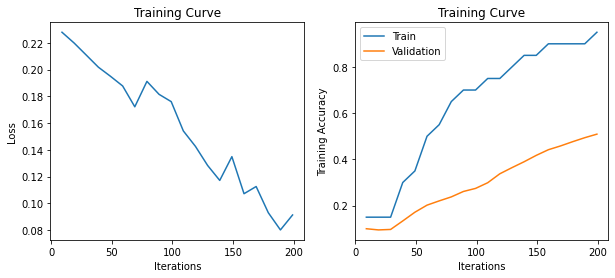

Final Training Accuracy: 0.95
Final Validation Accuracy: 0.5091836734693878


In [46]:
model = MNISTClassifier_parametrized(1000,500).to(device)
train(model, mnist_train, mnist_val, num_epochs=100)

## Większa liczba warstw może prowadzić do przeuczania

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
Epoch 1000
Epoch 1100
Epoch 1200
Epoch 1300
Epoch 1400
Epoch 1500
Epoch 1600
Epoch 1700
Epoch 1800
Epoch 1900
Epoch 2000
Epoch 2100
Epoch 2200
Epoch 2300
Epoch 2400
Epoch 2500
Epoch 2600
Epoch 2700
Epoch 2800
Epoch 2900


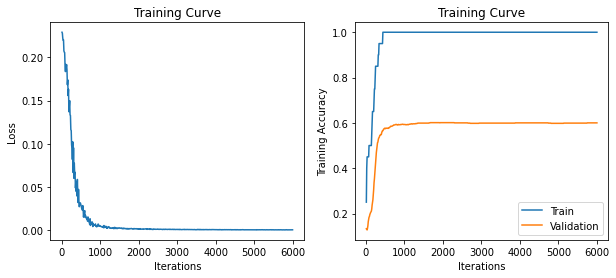

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6


In [47]:
model = MNISTClassifier_parametrized_3(1000,500,100).to(device)
train(model, mnist_train, mnist_val, num_epochs=3000)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
Epoch 1000
Epoch 1100
Epoch 1200
Epoch 1300
Epoch 1400
Epoch 1500
Epoch 1600
Epoch 1700
Epoch 1800
Epoch 1900
Epoch 2000
Epoch 2100
Epoch 2200
Epoch 2300
Epoch 2400
Epoch 2500
Epoch 2600
Epoch 2700
Epoch 2800
Epoch 2900


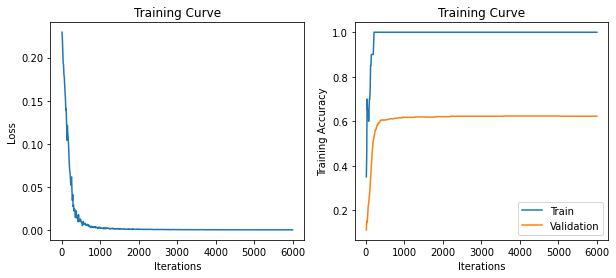

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6224489795918368


In [48]:
model = MNISTClassifier_parametrized(1000,500).to(device)
train(model, mnist_train, mnist_val, num_epochs=3000)

# Reprezentacja danych

In [66]:
adults_data_orig = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)

In [67]:
adults_data = adults_data_orig.copy()

In [68]:
adults_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "label"]

In [69]:
adults_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
adults_data.drop(columns=["native-country","education","workclass","relationship", "marital-status","race"],inplace=True)

In [71]:
adults_data

,age,fnlwgt,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,label
0,39,77516,13,Adm-clerical,Male,2174,0,40,<=50K
1,50,83311,13,Exec-managerial,Male,0,0,13,<=50K
2,38,215646,9,Handlers-cleaners,Male,0,0,40,<=50K
3,53,234721,7,Handlers-cleaners,Male,0,0,40,<=50K
4,28,338409,13,Prof-specialty,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Tech-support,Female,0,0,38,<=50K
32557,40,154374,9,Machine-op-inspct,Male,0,0,40,>50K
32558,58,151910,9,Adm-clerical,Female,0,0,40,<=50K
32559,22,201490,9,Adm-clerical,Male,0,0,20,<=50K


In [72]:
adults_data.sex = (adults_data.sex==' Male').astype(int)
adults_data.label = (adults_data.label==' >50K').astype(int)

In [73]:
categorical_columns = ["occupation"]
categorical_values = pd.get_dummies(adults_data[categorical_columns])
categorical_values.head()

,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
adults_data.drop(columns=categorical_columns,inplace=True)

In [75]:
train_indices = np.random.rand(len(adults_data))>0.3

In [76]:
numerical_data = torch.from_numpy(adults_data.values[train_indices,:-1]).float()
categorical_data = torch.from_numpy(categorical_values.values[train_indices]).float()
targets = torch.from_numpy(adults_data.values[train_indices,-1]).float()

test_numerical_data = torch.from_numpy(adults_data.values[~train_indices,:-1]).float()
test_categorical_data = torch.from_numpy(categorical_values.values[~train_indices]).float()
test_targets = torch.from_numpy(adults_data.values[~train_indices,-1]).float()

In [77]:
train_dataset = data.TensorDataset(numerical_data,categorical_data,targets)
test_dataset = data.TensorDataset(test_numerical_data,test_categorical_data,test_targets)

In [78]:
class Adults_classifier(nn.Module):
    def __init__(self):
        super(Adults_classifier, self).__init__()
        self.layer1 = nn.Linear(adults_data.shape[1] + categorical_data.shape[1] -1, 40)
        self.act_1 = nn.LeakyReLU()
        self.d1 = nn.Dropout(0.4)
        self.layer2 = nn.Linear(40, 20)
        self.act_2 = nn.LeakyReLU()
        self.d2 = nn.Dropout(0.4)
        self.layer3 = nn.Linear(20, 1)
    def forward(self, x, cat_x):
        x = torch.cat([x,cat_x],dim=1)
        activation1 = self.act_1(self.layer1(x))
        activation1 = self.d1(activation1)
        activation2 = self.act_2(self.layer2(activation1))
        activation2 = self.d1(activation2)
        output = self.layer3(activation2)
        return output

In [79]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval() #*********#
    for x, cat_x, labels in data_loader:
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        output = model(x, cat_x)
        pred = output>0
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += x.shape[0]
    return correct / total

In [80]:
model = Adults_classifier().to(device)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(10):
    epoch_losses = []
    for x, cat_x, labels in iter(train_loader):
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        model.train() 
        out = model(x, cat_x).squeeze()           

        loss = criterion(out, labels)
        loss.backward()  
        epoch_losses.append(loss.item())
        optimizer.step()              
        optimizer.zero_grad()         

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)
    test_acc = get_accuracy(model, test_loader)
    print(f"Epoch {n} loss {loss_mean:.3} test_acc: {test_acc:.3}")
    train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
    val_acc.append(test_acc)  # compute validation accuracy
        

print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 2.04e+02 test_acc: 0.755
Epoch 1 loss 13.7 test_acc: 0.757
Epoch 2 loss 7.89 test_acc: 0.759
Epoch 3 loss 4.53 test_acc: 0.76
Epoch 4 loss 2.69 test_acc: 0.761
Epoch 5 loss 1.71 test_acc: 0.761
Epoch 6 loss 1.08 test_acc: 0.761
Epoch 7 loss 0.786 test_acc: 0.761
Epoch 8 loss 0.643 test_acc: 0.761
Epoch 9 loss 0.587 test_acc: 0.762
Final Training Accuracy: 0.7683727034120735
Final Validation Accuracy: 0.7620863828471292


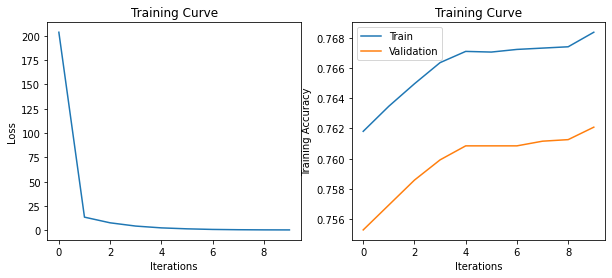

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

## Embeddingi

In [82]:
class Adults_classifier_embeddings(nn.Module):
    def __init__(self):
        super(Adults_classifier_embeddings, self).__init__()
        self.emb_layer = nn.Linear(categorical_data.shape[1], categorical_data.shape[1])
        self.act_emb = nn.Tanh()
        self.layer1 = nn.Linear(adults_data.shape[1] -1 + categorical_data.shape[1], 40)
        self.act_1 =  nn.LeakyReLU()
        self.d1 = nn.Dropout(0.4)
        self.layer2 = nn.Linear(40, 20)
        self.act_2 =  nn.LeakyReLU()
        self.d2 = nn.Dropout(0.4)
        self.layer3 = nn.Linear(20, 1)
    def forward(self, x, cat_x):
        cat_x_embedded = self.emb_layer(cat_x)
        cat_x_embedded = self.act_emb(cat_x_embedded)
        x = torch.cat([x,cat_x_embedded],dim=1)
        activation1 = self.act_1(self.layer1(x))
        activation1 = self.d1(activation1)
        activation2 = self.act_2(self.layer2(activation1))
        activation2 = self.d2(activation2)
        output = self.layer3(activation2)
        return output

In [84]:
model = Adults_classifier_embeddings().to(device)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(10):
    epoch_losses = []
    for x, cat_x, labels in iter(train_loader):
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        model.train() 
        out = model(x, cat_x).squeeze()           

        loss = criterion(out, labels)
        loss.backward()  
        epoch_losses.append(loss.item())
        optimizer.step()              
        optimizer.zero_grad()         

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)
    test_acc = get_accuracy(model, test_loader)
    print(f"Epoch {n} loss {loss_mean:.3} test_acc: {test_acc:.3}")
    train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
    val_acc.append(test_acc)  # compute validation accuracy
        

print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 1.97e+02 test_acc: 0.758
Epoch 1 loss 13.6 test_acc: 0.758
Epoch 2 loss 7.91 test_acc: 0.758
Epoch 3 loss 4.6 test_acc: 0.759
Epoch 4 loss 2.41 test_acc: 0.759
Epoch 5 loss 1.17 test_acc: 0.759
Epoch 6 loss 0.764 test_acc: 0.758
Epoch 7 loss 0.679 test_acc: 0.757
Epoch 8 loss 0.627 test_acc: 0.76
Epoch 9 loss 0.587 test_acc: 0.759
Final Training Accuracy: 0.7653105861767279
Final Validation Accuracy: 0.7590970003092464


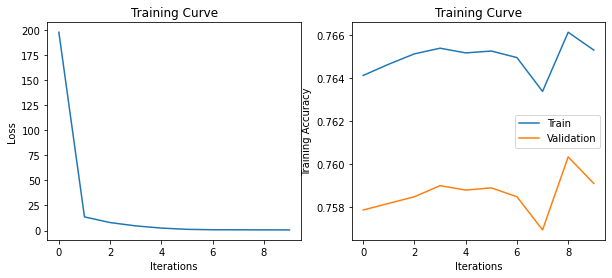

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

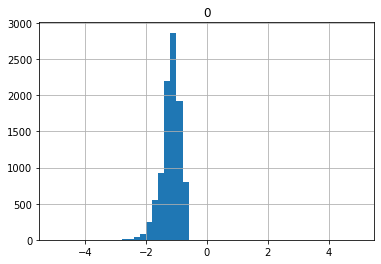

In [86]:
preds = model(test_numerical_data.to(device),test_categorical_data.to(device))
pd.DataFrame(preds.cpu().detach().numpy()).hist(bins=50, range=(-5,5));

In [87]:
(preds>0).sum()

tensor(46, device='cuda:0')

# Ważenie przykładów

In [88]:
model = Adults_classifier_embeddings().to(device)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
criterion = nn.BCEWithLogitsLoss(pos_weight=(len(targets)-sum(targets))/sum(targets))
optimizer = optim.Adam(model.parameters(), lr=0.001)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(30):
    epoch_losses = []
    for x, cat_x, labels in iter(train_loader):
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        model.train() 
        out = model(x, cat_x).squeeze()           

        loss = criterion(out, labels)
        loss.backward()  
        epoch_losses.append(loss.item())
        optimizer.step()              
        optimizer.zero_grad()         

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)
    test_acc = get_accuracy(model, test_loader)
    print(f"Epoch {n} loss {loss_mean:.3} test_acc: {test_acc:.3}")
    train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
    val_acc.append(test_acc)  # compute validation accuracy
        

print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 4.06e+02 test_acc: 0.246
Epoch 1 loss 23.4 test_acc: 0.246
Epoch 2 loss 14.5 test_acc: 0.246
Epoch 3 loss 9.27 test_acc: 0.396
Epoch 4 loss 5.89 test_acc: 0.441
Epoch 5 loss 3.59 test_acc: 0.774
Epoch 6 loss 2.42 test_acc: 0.607
Epoch 7 loss 1.77 test_acc: 0.562
Epoch 8 loss 1.41 test_acc: 0.76
Epoch 9 loss 1.26 test_acc: 0.619
Epoch 10 loss 1.17 test_acc: 0.346
Epoch 11 loss 1.13 test_acc: 0.772
Epoch 12 loss 1.11 test_acc: 0.753
Epoch 13 loss 1.1 test_acc: 0.762
Epoch 14 loss 1.07 test_acc: 0.33
Epoch 15 loss 1.07 test_acc: 0.28
Epoch 16 loss 1.06 test_acc: 0.77
Epoch 17 loss 1.05 test_acc: 0.279
Epoch 18 loss 1.06 test_acc: 0.784
Epoch 19 loss 1.04 test_acc: 0.355
Epoch 20 loss 1.04 test_acc: 0.789
Epoch 21 loss 1.02 test_acc: 0.787
Epoch 22 loss 1.03 test_acc: 0.293
Epoch 23 loss 1.04 test_acc: 0.791
Epoch 24 loss 1.03 test_acc: 0.793
Epoch 25 loss 1.03 test_acc: 0.794
Epoch 26 loss 1.02 test_acc: 0.786
Epoch 27 loss 1.03 test_acc: 0.791
Epoch 28 loss 1.01 test_acc: 0.

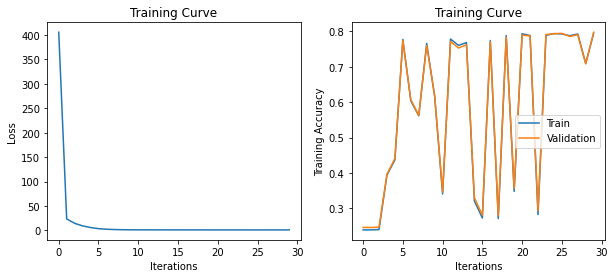

In [89]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

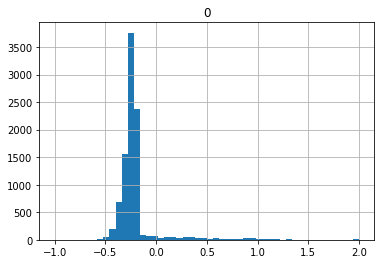

In [90]:
preds = model(test_numerical_data.to(device),test_categorical_data.to(device))
pd.DataFrame(preds.cpu().detach().numpy()).hist(bins=50, range=(-1,2));

In [91]:
(preds>0).sum()

tensor(848, device='cuda:0')

# Zadanie domowe
Dokończ pracę nad modelem dla predykcji zarobków (uwzględniając pozostałe kolumny, grupując je w embeddingi, ważąc klasy itp.)